In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [103]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data,index=['a','b','c','d'])
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


## 1. 추가
- 수정과 같은 형태
- 컬럼(or 행)이 있으면 수정, 없으면 추가

### (1) 컬럼 추가

In [4]:
df['rank'] = [1,2,3,4]
df

,eng,kor,math,rank
a,10,20,90,1
b,30,40,50,2
c,50,60,20,3
d,70,80,70,4


In [7]:
df['kor'] + df['eng']

a     30
b     70
c    110
d    150
dtype: int64

In [9]:
df['my2'] = df['kor'] + df['eng']
df

,eng,kor,math,rank,my2
a,10,20,90,1,30
b,30,40,50,2,70
c,50,60,20,3,110
d,70,80,70,4,150


In [11]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


### (2) row 추가

In [15]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [16]:
df.loc['e'] = [50 ,60, 90]
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,50,60,90


## 2. 삭제
- df.drop()
- DataFrame은 index, column 두 기준으로 삭제할 수 있다
- Series는 sr.drop( '부여된 인덱스' )

In [17]:
df.drop( ['a','c'] )

,eng,kor,math
b,30,40,50
d,70,80,70
e,50,60,90


In [19]:
df.drop( columns=['kor','math'] )

,eng
a,10
b,30
c,50
d,70
e,50


## 3. 결측 데이터 처리
- NaN 확인
    - 각 컬럼별 결측치 개수 확인
        - df.isna().sum() 
            - 컬럼별 결측치의 개수 합 보여줌
    - 시각적으로 결측치 데이터 위치 확인
        - missingno.matrix( df )
- 처리 방법
    - 대표값으로 처리
        - df.fillna()
            - 평균
            - 중앙값
            - 범주형인 경우 최빈값
    - 삭제
        - df.dropna()

In [90]:
df.loc['b':'c', 'kor'] = np.nan # 결측치 만들기

In [91]:
df.loc['c':'d', 'math'] = np.nan # 결측치 만들기

In [79]:
df.isna().sum() # 컬럼별 합을 구해줌

eng     0
kor     2
math    2
dtype: int64

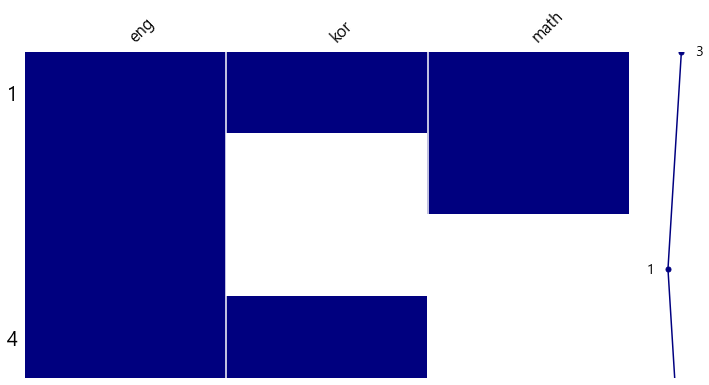

In [80]:
# ! pip install missingno
import missingno as mg

mg.matrix( df , color=(0,0,0.5), figsize=(12, 6) )
plt.show()

In [93]:
df.fillna(1)

,eng,kor,math
a,10,20.0,90.0
b,30,1.0,50.0
c,50,1.0,1.0
d,70,80.0,1.0


In [100]:
df['kor'].fillna( 3 )
df

,eng,kor,math
a,10,20.0,90.0
b,30,NaN,50.0
c,50,NaN,NaN
d,70,80.0,NaN


In [102]:
df.dropna(axis=0) # nan이 있는 행 삭제 axis = 0
df.dropna(axis=1) # nan이 있는 열 삭제 axis = 1
df.dropna( subset=['kor'] ) # 'kor'컬럼에 대해서만 삭제

,eng,kor,math
a,10,20.0,90.0
d,70,80.0,NaN


## 4. 정렬
- df.sort_index( )
- df.sort_values( )<br>
<br>
- 동률인 경우
    - by인자에 기준 컬럼을 1개가 아니라 2개를 준다
    - ex ) 국어 점수를 기준으로 정렬하고 동률이면 영어점수 기준
        - df.sort_values( by=[ 'kor' , 'eng' ] )

In [108]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [106]:
df.sort_index(ascending=False)

,eng,kor,math
d,70,80,70
c,50,60,20
b,30,40,50
a,10,20,90


In [109]:
df.sort_values( by='math')

,eng,kor,math
c,50,60,20
b,30,40,50
d,70,80,70
a,10,20,90


In [113]:
df.loc['c','kor'] = 40 
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70


In [117]:
df.sort_values( by=['kor','eng'])

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70
